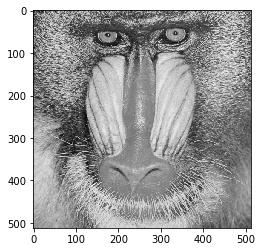

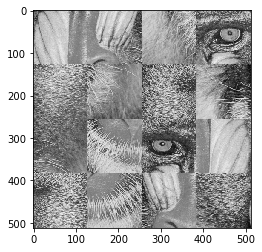

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# open image file and stores it in a numpy array
img = plt.imread('./images/baboon.png')

# show original image
plt.imshow(img, cmap='gray')
plt.show()

# shuffle image blocks
newOrder = [6, 11, 13, 3, 8, 16, 1, 9, 12, 14, 2, 7, 4, 15, 10, 5]
shuffledimg = np.zeros(img.shape)

def get_block(img, block):
  height, length = img.shape
  vinc, hinc = (height / 4, length / 4)
  y = int((hinc * block) // length)
  x = block - (4 * y)
  return (round(y * vinc), round((y + 1) * vinc), round(x * hinc), round((x + 1) * hinc))

for i in range(16):
  sy, syf, sx, sxf = get_block(shuffledimg, i)
  y, yf, x, xf = get_block(img, newOrder[i] - 1)
  shuffledimg[sy:syf,sx:sxf] += img[y:yf,x:xf]


# show shuffled image
plt.imshow(shuffledimg, cmap='gray')
plt.show()

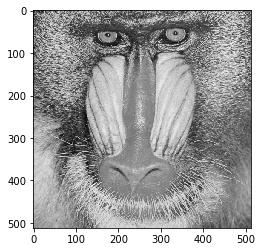

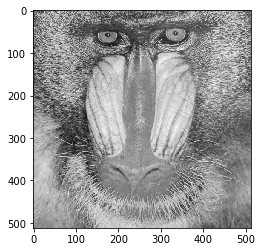

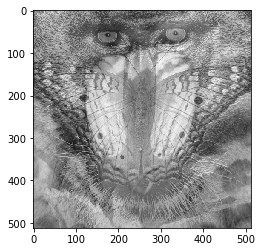

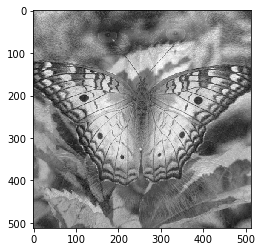

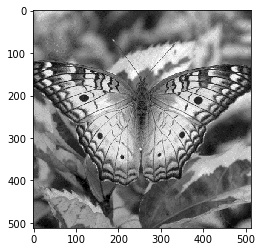

In [2]:
import matplotlib.pyplot as plt
import numpy as np

imga = plt.imread('./images/baboon.png')
imgb = plt.imread('./images/butterfly.png')

comboimga = .8 * imga + .2 * imgb
comboimgb = .5 * imga + .5 * imgb
comboimgc = .2 * imga + .8 * imgb

plt.imshow(imga, cmap='gray')
plt.show()
plt.imshow(comboimga, cmap='gray')
plt.show()
plt.imshow(comboimgb, cmap='gray')
plt.show()
plt.imshow(comboimgc, cmap='gray')
plt.show()
plt.imshow(imgb, cmap='gray')
plt.show()

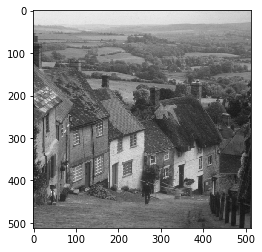

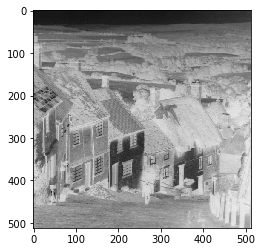

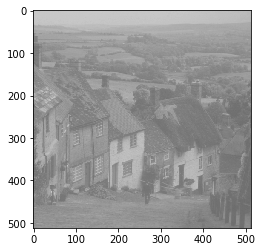

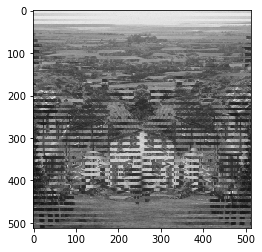

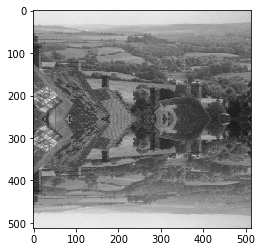

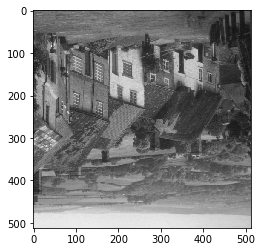

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

img = plt.imread('./images/city.png') * 255

negative = 255 - img

darker = (img / img.max()) * 100 + 100

evenflip = np.copy(img)
for i in range(0, img.shape[0], 2):
    evenflip[i] = np.flip(evenflip[i])

mirroredhalf = np.copy(img)
half = img.shape[0]/2
mirroredhalf[math.ceil(half):] = img[math.floor(half)-1::-1]

mirroredfull = img[::-1]

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(negative, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(darker, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(evenflip, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(mirroredhalf, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(mirroredfull, cmap='gray', vmin=0, vmax=255)
plt.show()

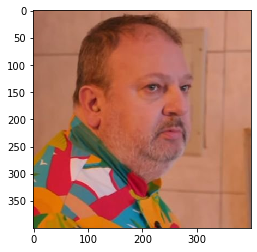

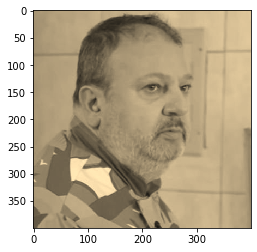

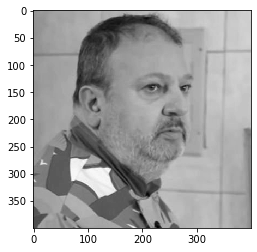

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# clipping alpha values out to obtain rgb values only
img = plt.imread('./images/jacquin.png')[:,:,:3]

rgbtransformation = np.empty(img.shape)
rgbtransformation[:,:,0] = 0.393*img[:,:,0] + 0.769*img[:,:,1] + 0.189*img[:,:,2]
rgbtransformation[:,:,1] = 0.349*img[:,:,0] + 0.686*img[:,:,1] + 0.168*img[:,:,2]
rgbtransformation[:,:,2] = 0.272*img[:,:,0] + 0.534*img[:,:,1] + 0.131*img[:,:,2]
rgbtransformation = np.clip(rgbtransformation, 0, 1)

grayscale = 0.2989*img[:,:,0] + 0.5870*img[:,:,1] + 0.1140*img[:,:,2]
grayscale = np.clip(grayscale, 0, 1)

plt.imshow(img)
plt.show()
plt.imshow(rgbtransformation)
plt.show()
plt.imshow(grayscale, cmap='gray')
plt.show()

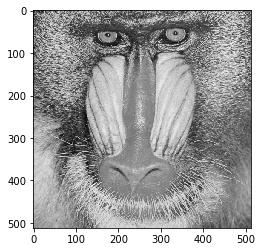

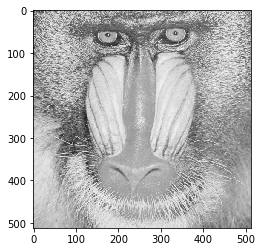

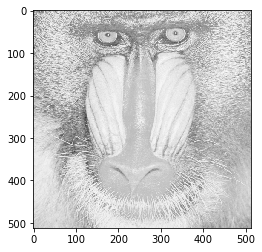

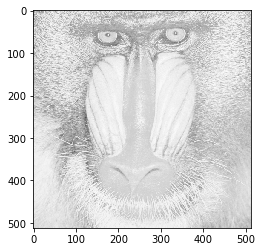

In [5]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('./images/baboon.png')

def brighten(i, g):
    return img ** (1/g)

brightera = brighten(img, 1.5)
brighterb = brighten(img, 2.5)
brighterc = brighten(img, 3.5)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(brightera, cmap='gray')
plt.show()
plt.imshow(brighterb, cmap='gray')
plt.show()
plt.imshow(brighterc, cmap='gray')
plt.show()

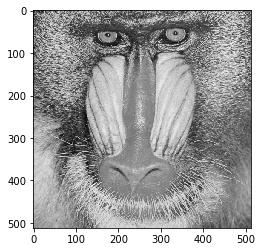

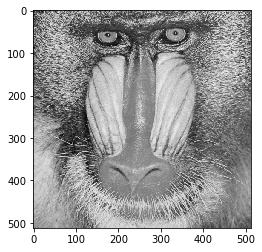

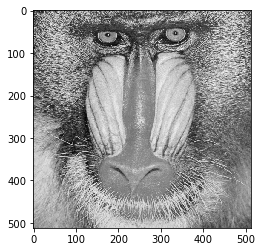

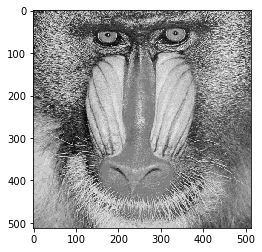

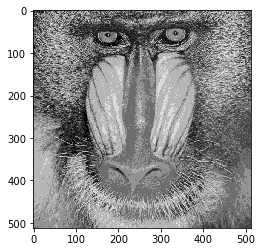

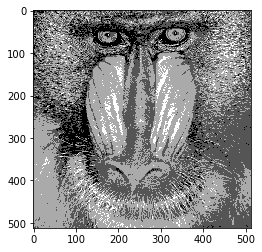

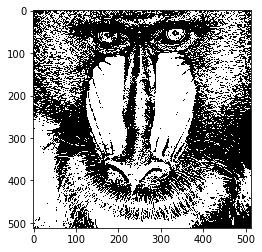

In [6]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('./images/baboon.png') * 255

def quantization(img, new, original=256):
    return np.floor(img / (original / new))

reduceda = quantization(img, 64)
reducedb = quantization(img, 32)
reducedc = quantization(img, 16)
reducedd = quantization(img, 8)
reducede = quantization(img, 4)
reducedf = quantization(img, 2)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(reduceda, cmap='gray')
plt.show()
plt.imshow(reducedb, cmap='gray')
plt.show()
plt.imshow(reducedc, cmap='gray')
plt.show()
plt.imshow(reducedd, cmap='gray')
plt.show()
plt.imshow(reducede, cmap='gray')
plt.show()
plt.imshow(reducedf, cmap='gray')
plt.show()

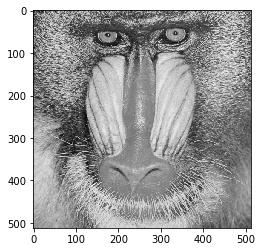

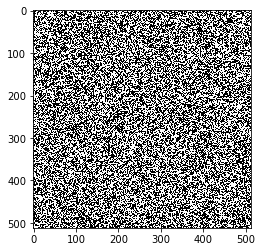

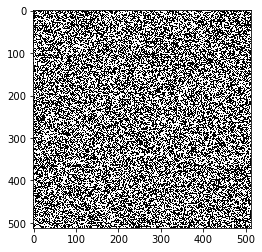

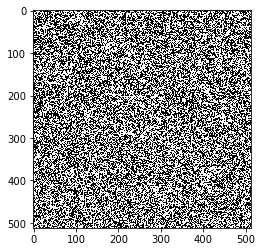

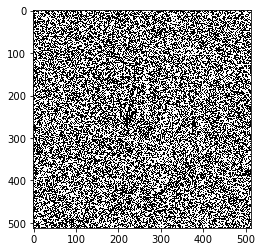

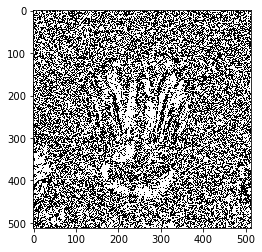

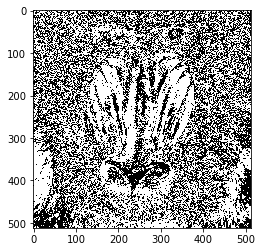

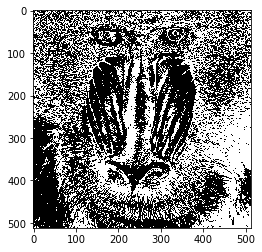

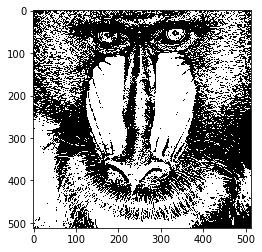

In [7]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('./images/baboon.png') * 255

def getbitplane(img, plane):
    bitplane = np.copy(img)
    for i in range(plane):
        bitplane = bitplane // 2
    return bitplane % 2

plt.imshow(img, cmap='gray')
plt.show()
for i in range(8):
    plt.imshow(getbitplane(img, i), cmap='gray')
    plt.show()

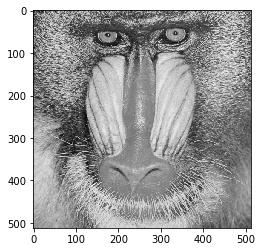

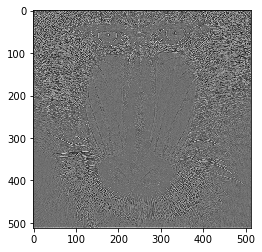

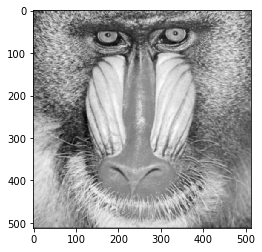

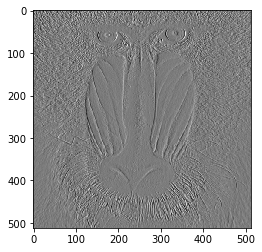

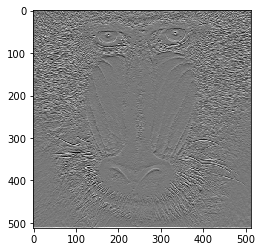

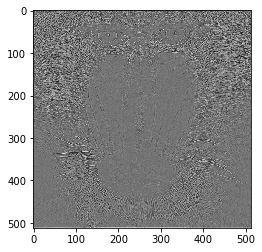

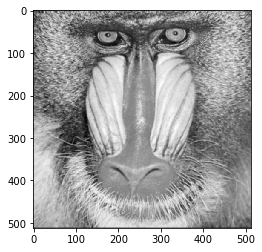

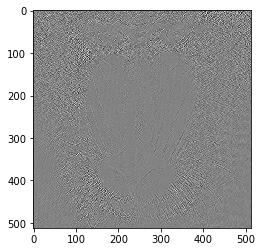

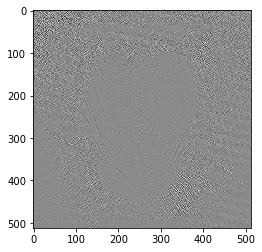

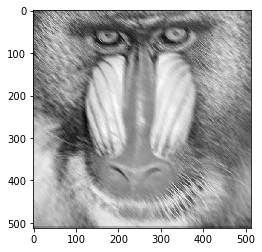

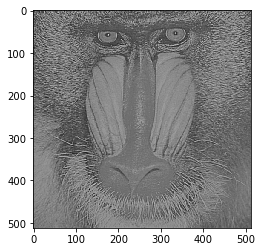

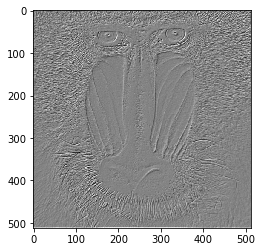

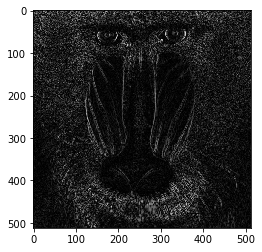

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

img = plt.imread('./images/baboon.png') * 255

h = []
h.append(np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]]))
h.append((1/256)*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]]))
h.append(np.array([[-1,0,1],[-2,0,2],[-1,0,1]]))
h.append(np.array([[-1,-2,-1],[0,0,0],[1,2,1]]))
h.append(np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]))
h.append((1/9)*np.array([[1,1,1],[1,1,1],[1,1,1]]))
h.append(np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]]))
h.append(np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]]))
h.append((1/9)*np.array([[1,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,1]]))
h.append((1/8)*np.array([[-1,-1,-1,-1,-1],[-1,2,2,2,-1],[-1,2,8,2,-1],[-1,2,2,2,-1],[-1,-1,-1,-1,-1]]))
h.append(np.array([[-1,-1,0],[-1,0,1],[0,1,1]]))

plt.imshow(img, cmap='gray')
plt.show()
for i in range(len(h)):
    plt.imshow(signal.convolve2d(img, h[i], boundary='symm', mode='same'), cmap='gray')
    plt.show()

h3_applied = signal.convolve2d(img, h[2], boundary='symm', mode='same')
h4_applied = signal.convolve2d(img, h[2], boundary='symm', mode='same')
result = (h3_applied**2 + h4_applied**2)**(1/2)
plt.imshow(result, cmap='gray')
plt.show()